# 1. MNIST

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

불러들인 mnist는 딕셔너리 구조

- data
- target
- feature_names (pixel 1 ~ 784)
- etc

In [2]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [3]:
import numpy as np

y = y.astype(np.int)

In [4]:
y.shape

(70000,)

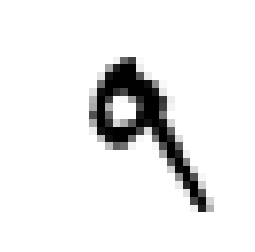

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[60007]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [6]:
y[60007]

9

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [8]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

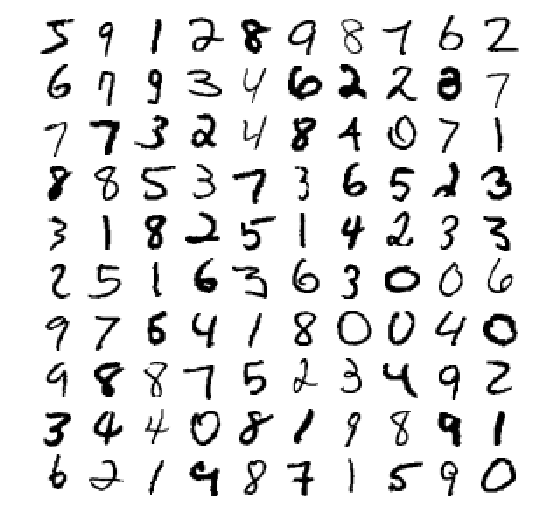

In [9]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

In [10]:
# 이미 앞쪽 60,000개는 훈련셋이고 뒤쪽 10,000개는 테스트 셋으로 나뉘어져 있다

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

train set을 섞어서 모든 cv fold들이 비슷해지도록 하자. (하나의 폴드라도 특정 숫자가 누락되면 안됨)

*** 어떤 학습 알고리즘은 (ex. Stochastic Gradient Decent) train set의 샘플의 순서에 민감해서 비슷한 샘플이 연이어 나타나면 성능이 나빠진다.

*** 물론 어떤 경우에는 (ex. 시계열 데이터) 데이터 샘플들을 섞는 것이 오히려 안좋을 수도 있다.

# 2. 이진 분류기 훈련

In [12]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
print (np.asarray((unique_train, counts_train,counts_test)).T)

[[   0 5923  980]
 [   1 6742 1135]
 [   2 5958 1032]
 [   3 6131 1010]
 [   4 5842  982]
 [   5 5421  892]
 [   6 5918  958]
 [   7 6265 1028]
 [   8 5851  974]
 [   9 5949 1009]]


In [13]:
y_train_9 = (y_train==9)
y_test_9 = (y_test==9)

### Stochastic Gradient Decent

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state= 42)
sgd_clf.fit(X_train, y_train_9)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

# 3. 성능 측정

## 3-1 교차 검증을 사용한 정확도 측정

2장에서 공부한 교차 검증 기능을 직접 구현해보자. cross_val_score() 메서드와 거의 같은 작업을 수행하고 동일한 결과를 출력한다.

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.89725


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.9506


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.9525


cv 3 fold로 교차 검증을 실행해보니 각 fold 별로 accuracy는 평균 93% 정도가 나왔다.

In [17]:
# 내장돼있는 cross_val_score() 메서드 쓰면 한 줄이면 끝난다.
# 물론 이 메서드가 어떻게 돌아가는 건지 내용을 이해해보자는 데에 의의를 두자
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring='accuracy')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([0.89725, 0.9506 , 0.9525 ])

어쨌든 교차 검증 단계로는 얼핏보면 매우 만족스럽다. 하지만 잊지 말아야 할 것은 우리의 classifier가 타겟이 "9이냐, 9가 아니냐" 만을 판별하는 것이다. 그런데 앞서 확인했을 때 0~9까지 각각의 클래스는 대부분 동일한 비율을 갖고 있었다. 

즉, 애초에 전체 데이터 셋의 90%가 5가 아닌 상태에서 95%의 확률로 타겟이 9인지 9가 아닌지 맞추는 것은 그렇고 고무적인 결과는 아니라는 것이다. (왜냐하면 모델이 "매우 나이브하게 모두 9가 아니라고만 판단"해도 적어도 90%의 accuracy는 보장되기 때문이다)

In [18]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring='accuracy')

array([0.9002 , 0.9012 , 0.90115])

### ★ 불균형 데이터셋을 다룰 때 accuracy를 classifier의 성능 측정 지표로 사용하는 것은 바람직하지 않다 ★

## 3-2 오차 행렬 Confusion Matrix

In [19]:
# cross_val_predict() 메서드는 cross_val_score() 메서드와 마찬가지로 K-fold cross-validation을 수행하지만,
# 평가 점수는 반환하지 않고 실제로 예측한 값을 반환한다.

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_9, y_train_pred)

array([[51552,  2499],
       [ 1494,  4455]], dtype=int64)

In [21]:
y_train_perfect_predictions = y_train_9
confusion_matrix(y_train_9, y_train_perfect_predictions)

array([[54051,     0],
       [    0,  5949]], dtype=int64)

<img src='confusion_matrix_update.png' width="1000">

## 3-3 정밀도(precision)와 재현율(recall)

In [22]:
from sklearn.metrics import precision_score, recall_score

print("precision_score:", precision_score(y_train_9, y_train_pred))
print("recall_score:", recall_score(y_train_9, y_train_pred))

precision_score: 0.6406384814495254
recall_score: 0.7488653555219364


<img src='f1_score.png' width="1000">

Precision과 Sensitivity의 조화평균

- Precision과 Sensitivity의 값이 비슷한 분류기에서 f1 score가 높다
- 하지만 f1 score가 높다고 반드시 좋은 것이 아니라 경우에 따라 Precision에, 혹은 Sensitivity에 초점을 맞춰야 할 때가 있다.

<img src='case1.png' width="1000">

<img src='case2_update.png' width="1000">

## 3-4 정밀도/재현율 trade-off

<img src='precision_sensitivity_trade-off.png' width="1000">

SGDClassifier는 결정 함수를 (decision function) 사용해서 각 샘플의 점수를 계산한다.

이 점수가 임계값 (threshold) 보다 크면 샘플을 양성 클래스에 (Positive)에 할당하고 (Predict), 그렇지 않으면 음성 클래스에 (Negative) 할당한다.

사이킷런에서는 임계값을 직접 지정해서 모델을 생성할 수는 없다.

하지만 각 샘플별로 예측에 사용된 점수는 (decision function에 의해서 계산된) 확인할 수 있으므로 이 점수를 기반으로 원하는 임계값을 정해서 예측을 만들 수 있다.

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([146337.74426658])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

score가 약 140000였는데 임계값을 0으로 했으면 당연히 true라고 나올 것이다.

그렇다면 아예 임계값을 score보다 더 높게 책정해보겠다.

In [25]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

임계값을 높이니 원래 9인 데이터를 9가 아니라고 예측했다. 즉 FN이 올라갔고, 재현율이 감소했다.

그렇다면 적절한 임계값을 어떻게 측정할 수 있을까?

1. cross_val_predict() 메서드를 통해 train set에 있는 모든 샘플의 점수를 구하고,

2. precision_recall_curve() 메서드를 통해 가능한 모든 임계값에 대한 정밀도와 재현율을 계산할 수 있다.

In [26]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3, method = 'decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

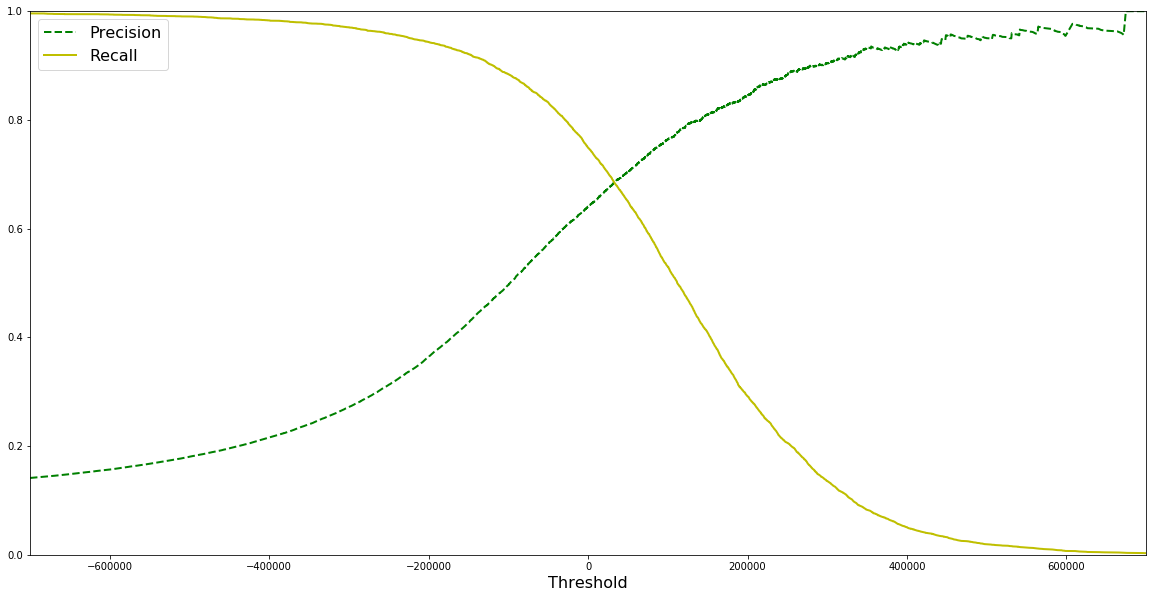

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "g--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "y-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
# save_fig("precision_recall_vs_threshold_plot")
plt.show()

Precision이 끝에서 울퉁불퉁한 이유는, 가끔 임계값을 올리더라도 Precision이 낮아지는 경우도 있기 때문이다.

trade-off 그림을 보면 가운데 임계값에서 오른쪽으로 숫자 하나만큼 이동하면 5 하나는 줄어들고 6은 남기 때문에 precision이 다소 낮아지게 되는 것이다. (비율이라서) 반면 recall은 임계값이 올라감에 따라 줄어들 수 밖에 없어서 부드러운 곡선이 된다.

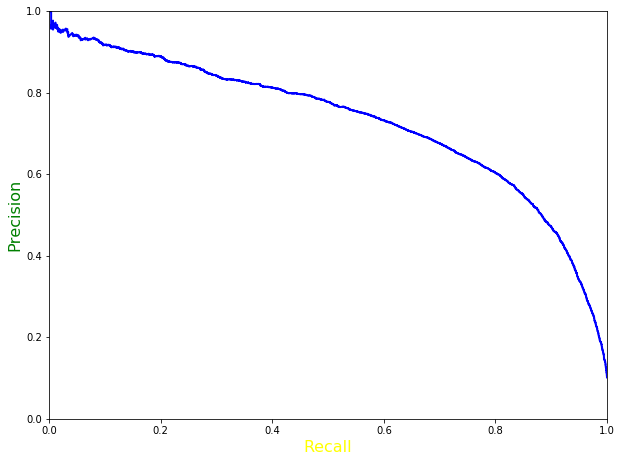

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16, color = 'yellow')
    plt.ylabel("Precision", fontsize=16, color = 'green')
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(10, 7.5))
plot_precision_vs_recall(precisions, recalls)
# save_fig("precision_vs_recall_plot")
plt.show()

In [29]:
# Precision / Recall curve 아래의 면적을 계산하자. 추후에 서로 다른 모델을 비교하는 데 도움이 된다.
# 면적이 넓을수록 좋은 모델

from sklearn.metrics import average_precision_score

under_curve = average_precision_score(y_train_9, y_scores)
under_curve

0.7303109737572462

Recall 80% 근처에서 Precision이 급격하게 줄어들기 시작한다. 

이 하강점 직전을 Precision_Recall_trade-off로 선택하는 것이 좋다.

Precision이 90%를 달성하는 것이 목표라고 가정하자. 

그러면 임계값이 220,000 정도임을 확인할 수 있다.

In [30]:
y_train_pred_90 = (y_scores > 220000)

In [31]:
print("Precision_score:", precision_score(y_train_9, y_train_pred_90))
print("Recall_score:", recall_score(y_train_9, y_train_pred_90))

Precision_score: 0.8655270655270655
Recall_score: 0.25533703143385444


프로젝트에 따라서 Precision이 높아야 될 수도, Recall이 높아야 될 수도 있다.

그에 따라서 원하는 수준에 따른 임계값 조정을 통해 모델을 생성할 수 있다.

이 때 주의할 점은 자신의 목표치에 달성하는 만큼 반대급부로 Recall/Precision 값이 떨어진다는 점이다.

따라서 Recall이 너무 낮은 High-Precision-Classifier는 유용하지 않으니 수용 가능한 수준을 정해야 한다.

## 3-5 ROC 곡선 (Receiver Operating Characteristic Curve)

<img src='roc_curve.png' width="1000">

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

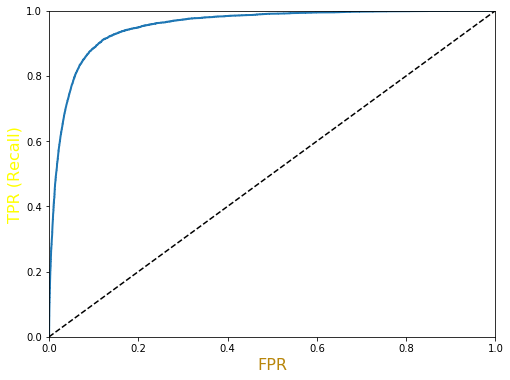

In [33]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16, color = "darkgoldenrod")
    plt.ylabel('TPR (Recall)', fontsize=16, color = "yellow")

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
# save_fig("roc_curve_plot")
plt.show()

여기에서도 trade-off를 확인할 수 있다.

TPR(재현율)이 높을수록 FPR이 올라간다.

모델 간의 성능 비교를 위해 곡선 아래의 면적을 (AUC / Area Under the Curve) 측정하자.

** (bad) 0.5 <= AUC <= 1 (good)

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_9, y_scores)

0.9535292087422004

### ROC curve VS. Precision_Recall curve

- Precision_Recall curve를 사용하는 경우
    1. Positive class가 드문 경우
    2. FN 보다 FP가 더 중요한 경우


- ROC curve를 사용하는 경우
    - 위의 경우가 아닌 경우

이 경우는 ROC curve를 사용했을 때 성능이 매우 좋아보이지만 (auc가 0.95에 달함),

실제로 Positive class가 희박한 데이터셋이므로 오히려 Precision_Recall curve를 사용하는 것이 더 좋을 수 있다.

또한 Precision_Recall curve를 보면 분류기의 성능 개선 여지가 얼마나 되는지 (오른쪽 위 모서리에 가까워질 수 있는지) 잘 보여준다.

### Random Forest VS. SGD

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3, method = 'predict_proba')

Random Forest와 SGD의 ROC curve와 AUC score를 비교하기 해보자.

이때, Random Forest는 작동 방식의 차이 때문에 decision_function() 메서드는 없다.

대신에 predict_proba() 메서드를 사용할 수 있다.

predict_proba() 메서드는 샘플이 행, 클래스가 열로써, 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환한다. 즉 decision_function과 같은 기능을 하는 것으로 볼 수 있다.

하지만 ROC curve를 그리려면 확률이 아니라 점수가 필요하다.

따라서 Positive class의 확률을 점수로 사용하자.

In [39]:
y_scores_forest = y_probas_forest[:, 1]  # 양성 클래스에 대한 확률을 점수로 사용하자.
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9, y_scores_forest)

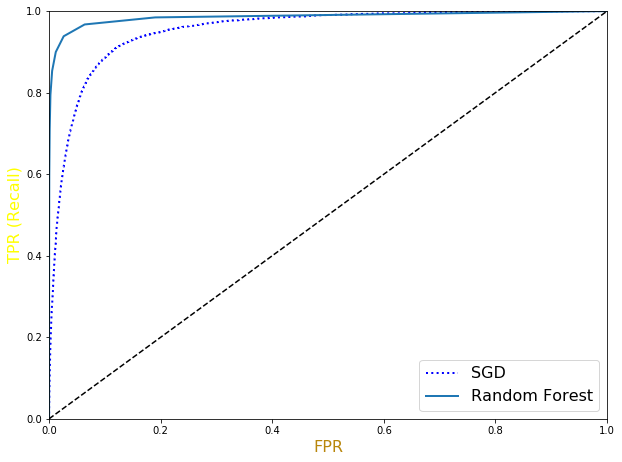

In [41]:
plt.figure(figsize=(10, 7.5))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
# save_fig("roc_curve_comparison_plot")
plt.show()

Random Forest의 ROC curve가 SGD보다 왼쪽 위 모서리에 더 가까워 훨씬 좋아 보인다.

In [42]:
roc_auc_score(y_train_9, y_scores_forest)

0.98564400519996

In [43]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3)
print("Precision_score:", precision_score(y_train_9, y_train_pred_forest))
print("Recall_score:", recall_score(y_train_9, y_train_pred_forest))

Precision_score: 0.9730286184887791
Recall_score: 0.7944192301227097


지금까지 binary classification 상황에서 

1. classifier를 훈련시키는 방법
2. 작업에 맞는 적절한 지표 선택
3. 교차 검증을 사용한 평가
4. 요구사항에 맞는 Precision / Recall trade-off 선택
5. ROC curve와 AUC score를 사용한 모델간의 비교

에 대해서 공부했다.

# 4. 다중 분류

<img src='ova.png' width='700'>
<img src='ovo.png' width='700'>

In [47]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([9])

이 모델을 훈련시킬 때 "5인지 아닌지에 대한 y_train_5"가 아니라
0 부터 9까지의 모든 숫자가 담겨있는 원래의 타겟 클래스인 y_train을 사용한다.

내부에서는 실제로 10개의 분류기가 생성, 훈련되고 각각의 decision score를 얻어서 점수가 가장 높은 클래스를 (여기서는 9) 선택한다.

In [49]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-805275.09799121,  -54238.14927459, -268011.12783563,
        -246551.47449442, -157889.05712394, -110638.59018398,
        -310079.89135471, -276991.14008855,  -75779.18163159,
         146337.74426658]])

가장 높은 점수가 class 9에 해당하는 값이다.

In [50]:
np.argmax(some_digit_scores)

9

In [51]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
sgd_clf.classes_[9]

9

분류기가 훈련될 때 classess_ 속성에 타겟 클래스의 리스트를 값으로 정렬하여 저장한다.

이 경우에는 classes_ 배열에 있는 각 클래스의 인덱스가 곧 클래스 값 자체와 같다.

하지만 일반적으로 이런 경우는 드무므로 위와 같이 실제 타겟 값과 저장된 인덱스 값의 일치를 확인해서 scores를 확인해야 한다.

사이킷런에서 OvO나 OvA를 사용하도록 강제하려면

- OneVsOneClassifier
- OneVsRestClassifier

를 사용한다. 

In [53]:
# SGDClassifier 기반으로 OvO 전략을 사용하는 다중 분류기를 만들어볼 것이다.

from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([9])

In [54]:
len(ovo_clf.estimators_)

45

In [55]:
# Random Forest 기반으로 다중 분류기 생성
# Random Forest는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 별도로 OvA나 OvO를 지정해줄 필요 X

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9])

In [56]:
# 분류기가 각 샘플에 부여한 클래스별 확률을 알아보자 (predict_proba() 메서드)

forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0.1, 0. , 0.2, 0. , 0. , 0.2, 0. , 0.5]])

생성한 다중 분류기를 교차 검증을 통해 평가하자.

In [57]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([0.88127375, 0.86929346, 0.86287943])

랜덤 분류기를 이용했더라면 10%의 정확도를 얻었을 텐데 이 만하면 봐줄만한 성능인 것 같다.

하지만 여전히 성능을 더 높일 수 있는 여지가 있다.

예를 들어 간단하게 입력의 스케일을 조정해보자

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([0.91191762, 0.9080954 , 0.91033655])

# 5. 에러 분석

최적의 모델을 하나 찾았다고 가정하고 이 모델의 성능을 더욱 향상시킬 방법에 대해 알아보자.

에러의 종류를 분석함으로써

In [59]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier

array([[5741,    2,   20,   12,   11,   48,   40,    7,   40,    2],
       [   1, 6442,   45,   27,    6,   43,   10,   13,  142,   13],
       [  58,   38, 5320,   96,   93,   23,   94,   57,  165,   14],
       [  52,   40,  131, 5344,    1,  237,   36,   57,  136,   97],
       [  22,   25,   29,    8, 5401,    7,   50,   33,   76,  191],
       [  76,   33,   28,  193,   77, 4619,  110,   29,  166,   90],
       [  33,   24,   43,    2,   45,   94, 5624,    6,   47,    0],
       [  23,   17,   69,   35,   60,   11,    5, 5813,   15,  217],
       [  53,  135,   63,  142,   17,  152,   52,   31, 5054,  152],
       [  47,   31,   26,   89,  171,   41,    2,  223,   70, 5249]],
      dtype=int64)

In [60]:
def plot_confusion_matrix(matrix):
    """컬러 오차 행렬을 원할 경우"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

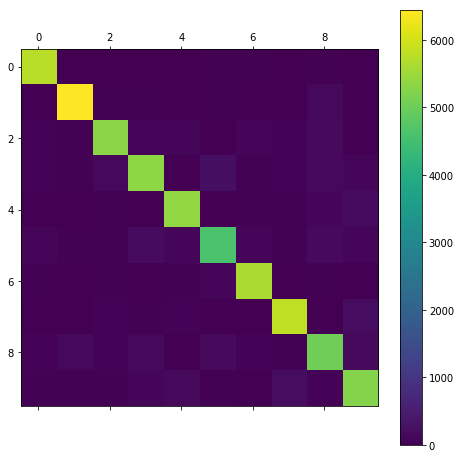

In [64]:
plot_confusion_matrix(conf_mx)
# save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

이 confusion matrix는 대부분의 이미지가 잘 분류됐음을 나타내는 주대각선에 있으므로 매우 좋아 보인다.

하지만 숫자 5는 다른 숫자보다 조금 더 짙은 녹색을 띄고 있다. 이는

1. 데이터셋에 숫자 5의 이미지가 적거나
2. 분류기가 숫자 5를 다른 숫자만큼 잘 분류하지 못한다는 뜻이다.

confusion matrix의 각 값을 대응되는 클래스의 이미지 개수로 나누어 

에러의 절대 개수가 아니라 에러의 비율을 비교한다.

(개수로 비교하면 이미지가 많은 클래스가 상대적으로 더 나쁘게 보이기 때문이다)

In [65]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

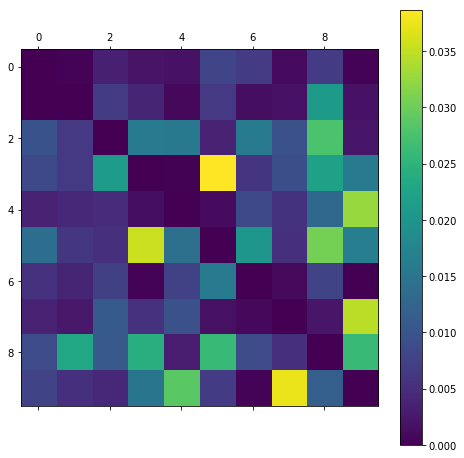

In [68]:
np.fill_diagonal(norm_conf_mx, 0)
plot_confusion_matrix(norm_conf_mx)
# save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

1. 클래스 8과 9열은 상대적으로 밝으므로 (에러 비율이 높으므로) 많은 이미지가 8과 9로 잘못 분류됐음을 암시한다.
2. 비슷하고 클래스 8과 9행 역시 상대적으로 밝으므로 숫자 8과 9가 다른 숫자로 자주 혼돈됐음을 알 수 있다.
3. 반대로 1열은 매우 어두우므로 대부분의 숫자 1이 정확하게 예측된 것임을 알 수 있다.
4. 에러가 정확히 대칭이 아니다. (왜냐하면 FN과 FP가 서로 다른 것이니까)

### 개선점 및 인사이트
- 3과 5의 혼돈
- 8과 9를 제대로 분류해내지 못함

### 어떻게 개선할 것인가
1. 훈련 데이터를 더 모은다.
2. 분류기에 도움이 될 만한 특성을 더 찾는다.
    - 동심원의 수를 세는 알고리즘 (8은 2개, 6은 1개, 5는 0개 등)
3. 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리 한다.

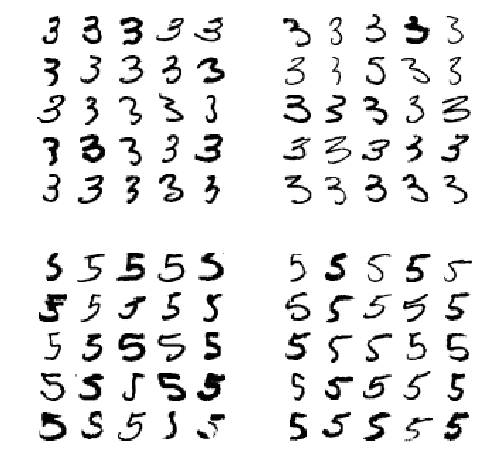

In [69]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
# save_fig("error_analysis_digits_plot")
plt.show()

            predict
           3        5
target 3

       5
         

# 6. 다중 레이블 분류

분류기가 각 샘플마다 여러 개의 이진 레이블을 출력. (ex.사진 얼굴 인식 분류기)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
knn_clf.predict([some_digit])

array([[ True,  True]])

9는 7보다 크고 -> True

9는 홀수다 -> True

In [74]:
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9773403325150609

K-NeighborsClassifier는 다중 레이블 분류를 지원하지만 모든 분류기가 지원하는 것은 아니다.

tree 계열 모델과 OneVsRestClassifier에서도 다중 레이블 분류를 지원한다.

### 다중 레이블 분류기의 성능 평가
각 레이블의 f1 score를 구하고 평균을 낸다. (혹은 레이블 클래스의 지지도를 가중치로 줘서 평균을 구한다)

- 지지도 (Support) : 타겟 레이블에 속한 샘플의 수
- average='weighted' 로 설정해주면 됨

# 7. 다중 출력 분류

다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것.

(값을 두 개 이상 가질 수 있다)

### 이미지에서 노이즈를 제거하는 시스템
- Input : 노이즈가 많은 숫자 이미지
- Output : 다중 레이블 (픽셀 당 한 레이블. 즉 784개의 픽셀이 있으므로 784개의 레이블)
    - 각 레이블은 여러 개의 값을 가진다. (0 ~ 255까지의 픽셀 강도) (not binary)

In [77]:
# noise를 추가해준다

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

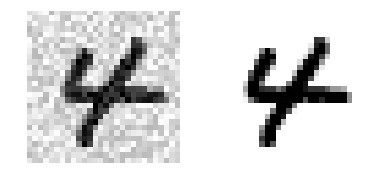

In [78]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
# save_fig("noisy_digit_example_plot")
plt.show()

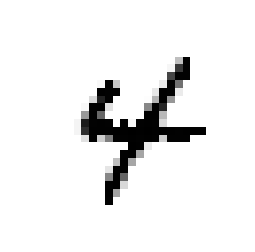

In [79]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
# save_fig("cleaned_digit_example_plot")

### 이번 장에서 배운 내용
1. 분류 작업에서 좋은 측정 지표를 선택
2. 적절한 Precision_Recall trade-off를 선택
3. 분류기를 비교하는 방법

# 8. 연습문제